# ML Project : **Software Developer Salary Prediction**
##*By - Sahil Pal ( 19csu265 )*

#### The Aim is to predict the salary of a software developer on the basis of country, educational qualification and years of experience etc... using the DecisionTree Regressor Algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# loading the dataset
df = pd.read_csv("/content/drive/MyDrive/datasets/survey_results_public.csv")

##Preprocessing the data

In [ ]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [ ]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary", "YearsCodePro" : "Experience"}, axis=1)
df.head()

,Country,EdLevel,Experience,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [ ]:
# removing the records where salary is NaN
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,Experience,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     34756 non-null  object 
 1   EdLevel     34188 non-null  object 
 2   Experience  34621 non-null  object 
 3   Employment  34717 non-null  object 
 4   Salary      34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

Country         0
EdLevel       568
Experience    135
Employment     39
Salary          0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.Experience = imputer.fit_transform(df['Experience'].values.reshape(-1,1))[:,0]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.isnull().sum()

Country         0
EdLevel       568
Experience      0
Employment     39
Salary          0
dtype: int64

In [ ]:
# dropping other rows
df = df.dropna()
df.isnull().sum()

Country       0
EdLevel       0
Experience    0
Employment    0
Salary        0
dtype: int64

In [ ]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30127 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     30127 non-null  object 
 1   EdLevel     30127 non-null  object 
 2   Experience  30127 non-null  object 
 3   Salary      30127 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


## PreProcessing on each feature

In [ ]:
df['Country'].value_counts()

United States                       7583
India                               2444
United Kingdom                      2291
Germany                             1913
Canada                              1186
                                    ... 
Barbados                               1
Andorra                                1
Saint Vincent and the Grenadines       1
Belize                                 1
San Marino                             1
Name: Country, Length: 154, dtype: int64

In [ ]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

country_map = shorten_categories(df.Country.value_counts(), 550)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other             9625
United States     7583
India             2444
United Kingdom    2291
Germany           1913
Canada            1186
Brazil             993
France             974
Spain              672
Australia          661
Netherlands        656
Poland             567
Italy              562
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


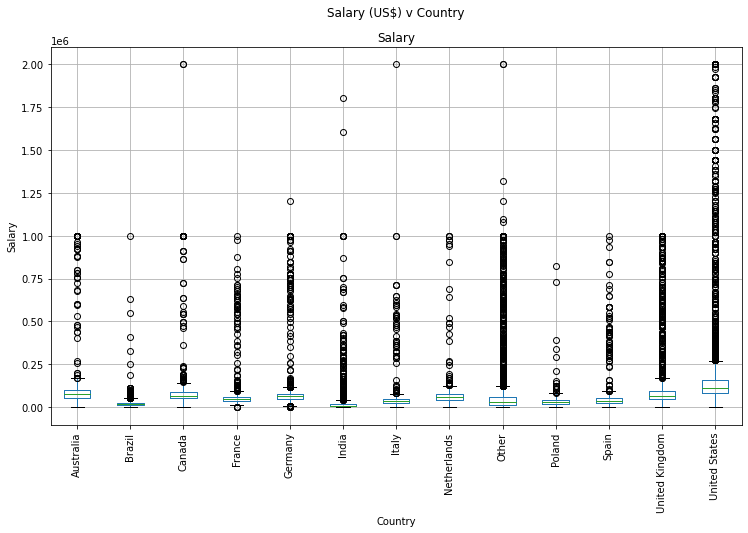

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# removing outliers 
df = df[df["Salary"] <= 150000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

In [ ]:
df["Experience"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '15', '25', '9', '11', 'Less than 1 year', '5', '21', '16',
       '14', '18', '32', '22', '38', '23', '26', '27', '17', '24', '30',
       '19', '34', '33', '36', '40', '39', '31', '37', '45', '35', '41',
       '42', 'More than 50 years', '43', '44', '50'], dtype=object)

In [ ]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['Experience'] = df['Experience'].apply(clean_experience)

In [ ]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [ ]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [ ]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 2, 1, 3])

In [ ]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([11, 10,  9,  7,  4,  2,  6,  1,  3,  5,  8,  0])

## Spliting the data into training and test

In [ ]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

## Building models

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
linear_reg.score(X_test,y_test)

0.2964461314672814

In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train,y_train)
score = random_forest_reg.score(X_test,y_test)
y_pred = random_forest_reg.predict(X_test)
print("Score is : ",score)

Score is :  0.6316137141091612


In [ ]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
poly_reg.transform(X_train)
poly_reg.transform(X_test)

linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
linear_reg.score(X_test,y_test)

0.2964461314672814

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(criterion='mse',random_state=0)
dec_tree_reg.fit(X_train,y_train)
dec_tree_reg.score(X_test,y_test)

# r-square error
from sklearn.metrics import r2_score
r_sq = r2_score(y_test,y_pred)
print("R square error : ",r_sq)

R square error :  0.6316137141091612


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


## Predict new data point

In [ ]:
country_dict = { 
      "us" : "United States",
      "in" : "India",
      "uk" : "United Kingdom",
      "gr" : "Germany",
      "ca" : "Canada",
      "br" : "Brazil", 
      "fr" : "France",
      "sp" : "Spain",
      "aus" : "Australia",
      "neth" : "Netherlands",
      "po" : "Poland",
      "it" : "Italy"
}

education_dict = {
      "bd" : 'Bachelor’s degree',
      "md" : 'Master’s degree',
      "lb" : 'Less than a Bachelors',
      "pg" : 'Post grad'
}

In [ ]:
input_country = "us"
input_education = "md"
input_experience = '1'

inputs = np.array([[country_dict.get(input_country),education_dict.get(input_education), input_experience ]])

# label encoding the inputs
inputs[:, 0] = le_country.transform(inputs[:,0])
inputs[:, 1] = le_education.transform(inputs[:,1])
inputs = inputs.astype(float)
inputs
output_pred_salary = random_forest_reg.predict(inputs)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print("Expected Salary is $ ", output_pred_salary[0])

Expected Salary is $  86551.75958265066
